# Random Forest - Penguins
---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import myutils as my

In [2]:
pg = pd.read_csv('penguins.csv')
pg.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [3]:
pg.isna().sum(axis=0)

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

랜덤 포레스트는 결측값을 삭제하지 않고 관련없는, 범위에서 벗어나는(-99 등) 값으로 넣어버리면 됨

In [4]:
# !pip install missingno

<AxesSubplot: >

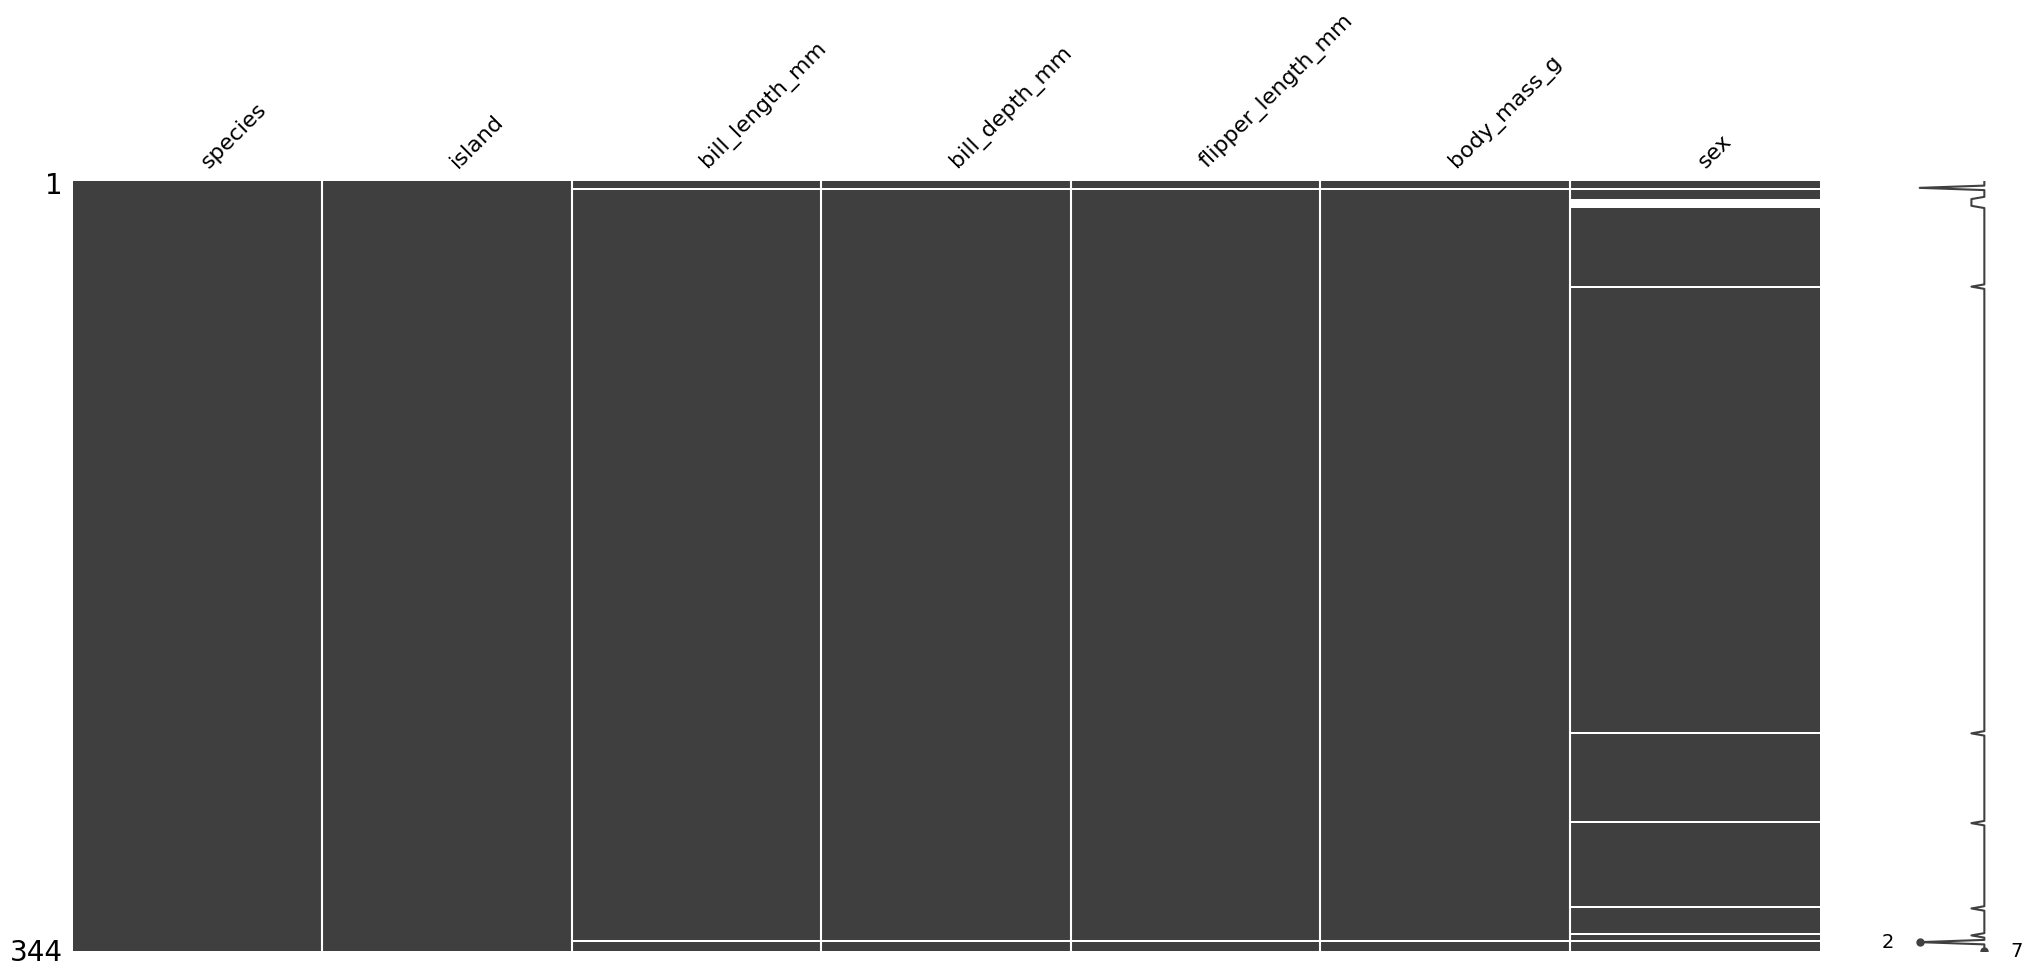

In [7]:
import missingno as msno

msno.matrix(pg)

In [11]:
pg.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

In [12]:
pg.loc[pg['bill_length_mm'].isna()]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN


<AxesSubplot: >

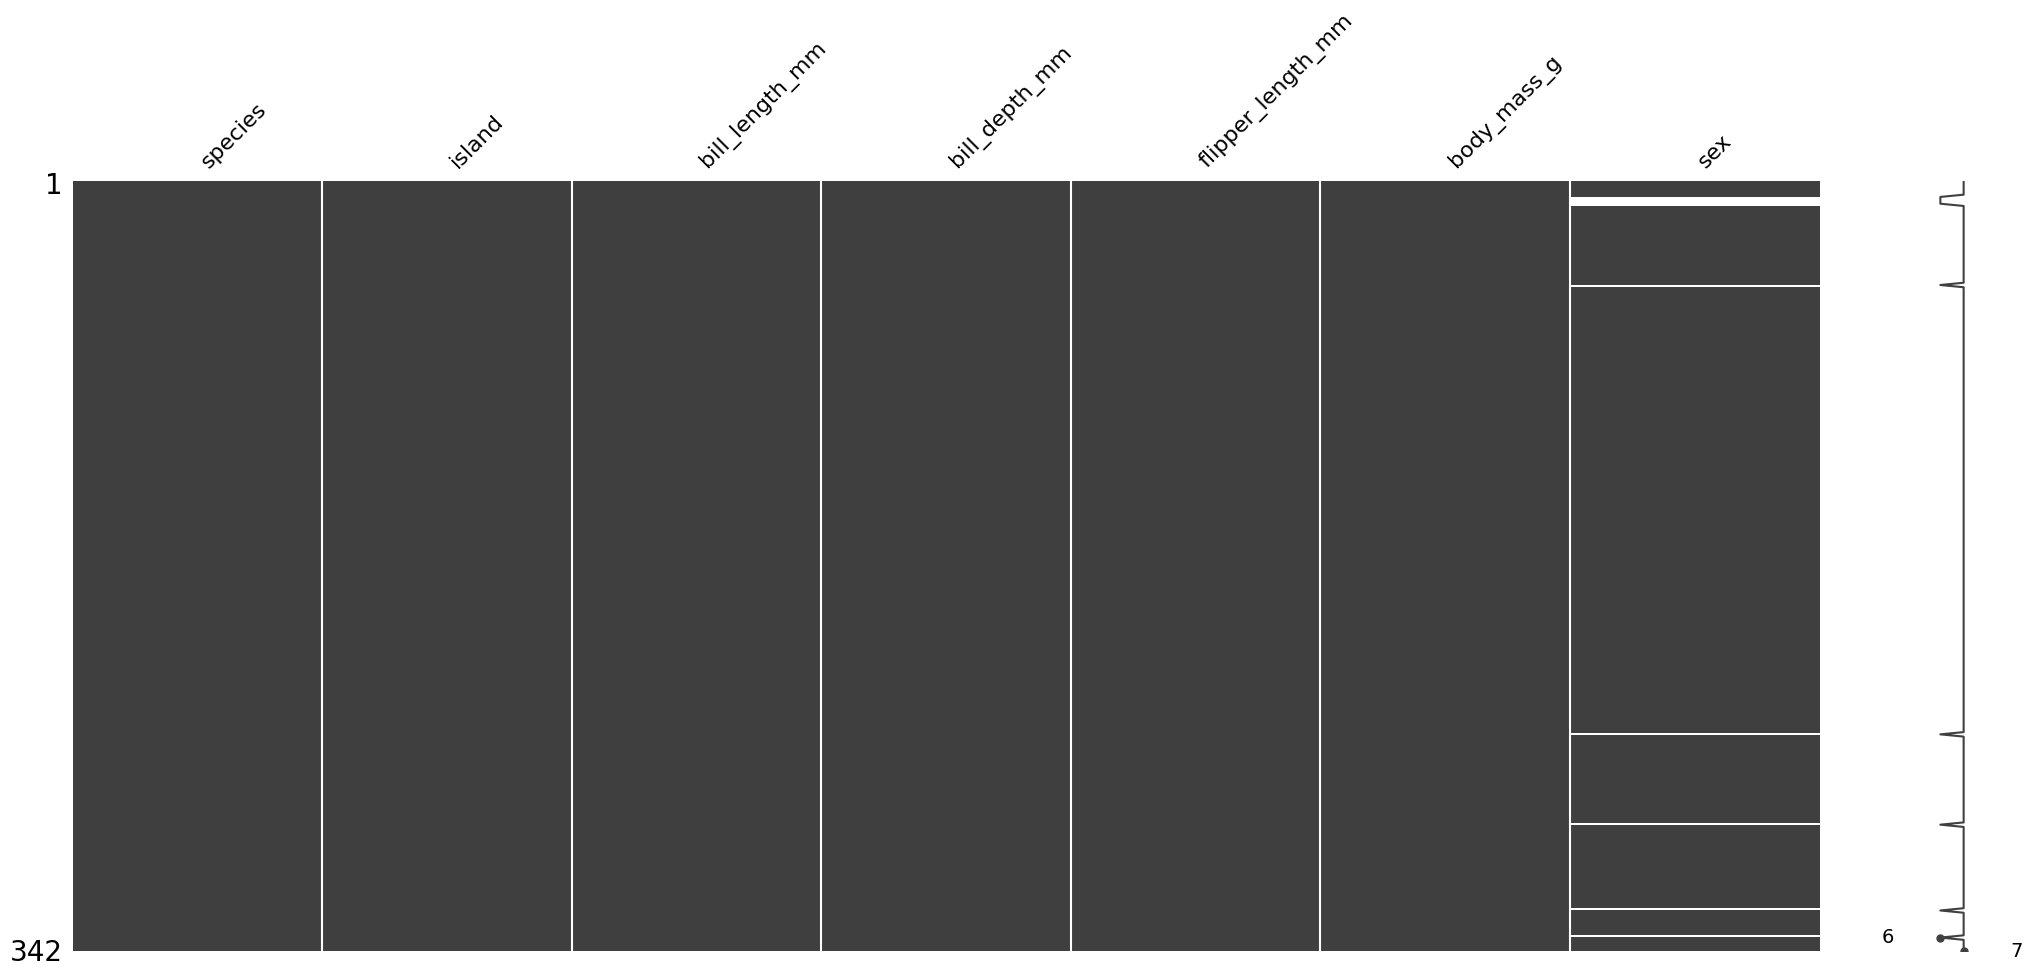

In [14]:
df=pg.dropna(subset=['bill_length_mm'])
msno.matrix(df)

In [20]:
df['sex'].value_counts()

MALE      168
FEMALE    165
Name: sex, dtype: int64

In [19]:
df.isna().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  9
dtype: int64

In [21]:
# 'NONE'
# 트리는 계산이 아니라 A or B? 식이라서 문자열로 넣어도 괜찮음.. 조건을 새로 걸어주는 것
df['sex'].fillna('NONE', inplace=True)

C:\Users\026\AppData\Local\Temp\ipykernel_4308\2236086127.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sex'].fillna('NONE', inplace=True)


In [22]:
df.isna().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [23]:
df['sex'].value_counts()

MALE      168
FEMALE    165
NONE        9
Name: sex, dtype: int64

In [30]:
X = df.iloc[:, 1:]
y = df.iloc[:, 0]

X.head()

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Torgersen,39.3,20.6,190.0,3650.0,MALE


In [31]:
X['sex'] = X['sex'].map({'MALE':1, 'FEMALE':0, 'NONE':2})
X.head()

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Torgersen,39.1,18.7,181.0,3750.0,1
1,Torgersen,39.5,17.4,186.0,3800.0,0
2,Torgersen,40.3,18.0,195.0,3250.0,0
4,Torgersen,36.7,19.3,193.0,3450.0,0
5,Torgersen,39.3,20.6,190.0,3650.0,1


In [32]:
X['island'] = X['island'].map({'Torgersen':2, 'Biscoe':0, 'Dream':1})
X.head()

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,2,39.1,18.7,181.0,3750.0,1
1,2,39.5,17.4,186.0,3800.0,0
2,2,40.3,18.0,195.0,3250.0,0
4,2,36.7,19.3,193.0,3450.0,0
5,2,39.3,20.6,190.0,3650.0,1


In [33]:
# # 인코딩
# from sklearn.preprocessing import LabelEncoder

# encoder = LabelEncoder()
# df['island'] = encoder.fit_transform(df['island'])

In [37]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state = 2022)


In [40]:
X_train = X_train.values

In [45]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=30, max_depth=3)
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, n_estimators=30)

In [46]:
clf.score(X_train, y_train)

0.9816849816849816

In [53]:
feature_name = X.columns

In [47]:
clf.feature_importances_

array([0.11620273, 0.29654743, 0.21076241, 0.23909461, 0.1359574 ,
       0.00143542])

In [55]:
sr = pd.Series(clf.feature_importances_, index = feature_name)
sr

island               0.116203
bill_length_mm       0.296547
bill_depth_mm        0.210762
flipper_length_mm    0.239095
body_mass_g          0.135957
sex                  0.001435
dtype: float64

In [56]:
sr = sr.sort_values(ascending=False)
sr

bill_length_mm       0.296547
flipper_length_mm    0.239095
bill_depth_mm        0.210762
body_mass_g          0.135957
island               0.116203
sex                  0.001435
dtype: float64

<AxesSubplot: >

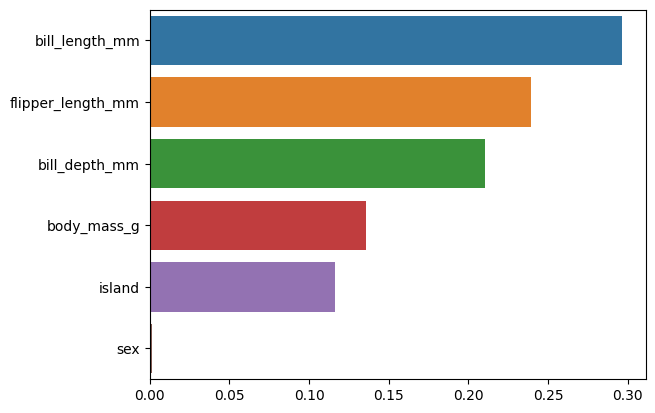

In [57]:
sns.barplot(x=sr, y = sr.index)